# Extras

If we have time: Changing the colormap with widgets in two ways -- The Michigan Depth Map

Order is:
1. Review of Michigan map
1. More complicated layout
1. Even more complicated layout and placement (perhaps unnecessarily so :D )


Import our usual things:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Also import ipywidgets:

In [2]:
import ipywidgets

## 1. Review of Michigan map: Michigan colormap and scale with interact

More info for `Output`: https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html

**Note:** If we are short on time, we might only get through the color-map-by-hand portion of this.

We'll need a few extra functions to do this sort of thing "by hand":

Last week we also started working with the Michigan Depth Map which we loaded with Numpy and performed some data cleaning on:

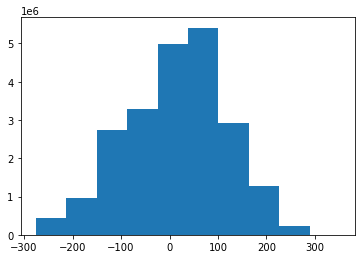

In [3]:
data_filename = '/Users/jnaiman/Downloads/michigan_lld.flt'
michigan = np.fromfile(data_filename, dtype='f4').reshape((5365, 4201))
michigan[michigan == -9999] = np.nan # set flagged bad data to NaN

# quick plot of depths:
plt.hist(michigan.flat)
plt.show()

Neat!  Let's look at this data more in the way that it was intended -- as an image.  We can use `matplotlib`'s `imshow` function to do this:

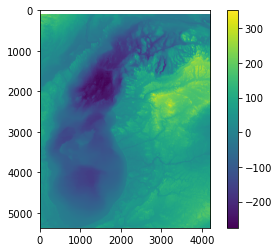

In [4]:
plt.imshow(michigan)
plt.colorbar()
plt.show()

### Question: 

Now that we've had a chance to look at our data a bit, what do we think the values represent?  What does a positive value mean?  Negative value?  Where do we think, spatially, these things will lie?

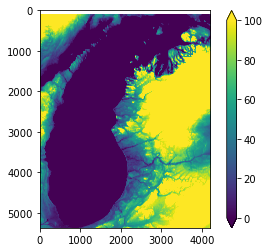

In [5]:
plt.imshow(michigan)
plt.clim(0, 100) # only plot from depths of 0->100
plt.colorbar(extend = 'both') # add little arrow ends
plt.show()

Let's see if we can't get a colormap that shows this outline better.  Turns out there is an actual "terrain" map:

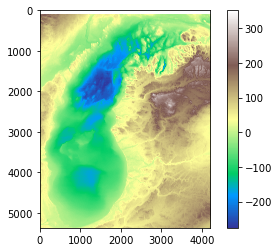

In [6]:
plt.imshow(michigan, cmap="terrain")
plt.colorbar()
plt.show()

So, while this is starting to look better, intutatively, we want our map to look bluish in the lake, and brownish on the land.  We can do this by doing a symmetric log color normalization:

In [7]:
import matplotlib.colors as colors

/Users/jnaiman/opt/anaconda3/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


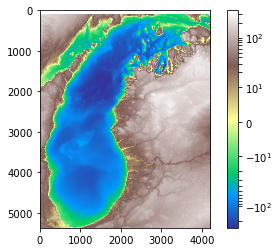

In [8]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.colorbar()
plt.show()

We can even set the color limits to be symmetric so that the yellow bit is right at zero elevation:

In [9]:
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

So, we'll make sure we make our colormap to include these limits:

/Users/jnaiman/opt/anaconda3/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


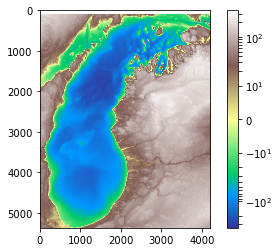

In [10]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
plt.show()

If we now look at our image, we see some interesting things.  So, now there is a sharp contrast between negative & positive depths/heights and there is not as much contrast between blue/green or brown/white.

But why?  Let's check out the docs for `SymLogNorm`:

In [11]:
colors.SymLogNorm?

This is a symmetrical log scale so it logs things both in the negative & positive directions.

Example:

In [12]:
np.log10([1,10,50]),np.log10(np.abs([-1,-10,-50]))

(array([0.     , 1.     , 1.69897]), array([0.     , 1.     , 1.69897]))

We see that 1 and 10 are mapped to a jump of 1 but 1->50 is mapped only to a jump of 0.7 instead of 40.

The lake Michigan data is a very high resolution map, so we can zoom in to see some cool details:

/Users/jnaiman/opt/anaconda3/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


(3300.0, 3900.0)

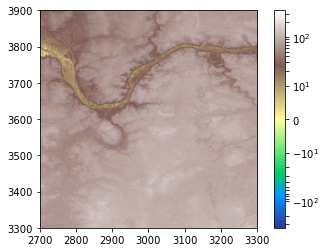

In [13]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
plt.xlim(2700, 3300)
plt.ylim(3300, 3900)

This shows us one of the rivers that feed into lake Michigan.

And just for fun, here is how it looks with our bad "jet" colormap:

/Users/jnaiman/opt/anaconda3/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


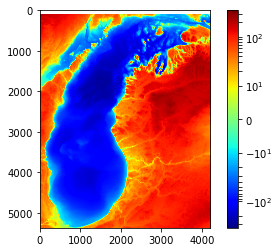

In [14]:
plt.imshow(michigan, cmap="jet", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
# ew.

One natural thing we might want to do is change color scheme and be able to toggle on and off the SymLogNorm color remapper.  We can do this 2 ways - by using our widget `@interact` decorator function again, and by explicitly laying out widgets.  Let's try to first way first:

In [15]:
@ipywidgets.interact(colormap = plt.colormaps(), color_range = (1.0, 352.0, 1.0), 
                     sym_log=True)
def plot(colormap = 'terrain', color_range = 352, sym_log = True):
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(6,8))
    # calling colorbar in a different way:
    CAX = ax.imshow(michigan, cmap=colormap, norm = norm)
    CAX.set_clim(-color_range, color_range)
    plt.colorbar(CAX, extend = 'both')
    plt.show()

interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…

## 2. More complicated layout

We can mess with the layout of our widgets by creating them externally, and then using them to plot.

Let's start with creating a dropdown widget for all of the colormaps:

In [16]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps())

Let's take a quick look:

In [17]:
cmap_widget

Dropdown(options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_…

Ok!  So we just have the stand-alone widget.  Since we know that some of the color maps work well/less well for this dataset, let's set a default of the "terrain" colormap to this widget:

In [18]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps(), value='terrain')

In [19]:
cmap_widget

Dropdown(index=154, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'Bu…

Finally, let's ad a description to this widget that is different from the default in the `@interacts` call above.

In [20]:
cmap_widget = ipywidgets.Dropdown(options=plt.colormaps(), value='terrain', description='Select colormap:')

In [21]:
cmap_widget

Dropdown(description='Select colormap:', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG',…

We note that now our description sort of "runs off" the page.  Because we have access to the individual widget, we can mess with the "layout" of this widget -- i.e., how it looks.

In [22]:
cmap_widget.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [23]:
cmap_widget.layout.width = '500px' # changes the box size

In [24]:
cmap_widget.style.keys # here is where the description width is hidden

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width']

In [25]:
cmap_widget.style.description_width = 'initial'
cmap_widget

Dropdown(description='Select colormap:', index=154, layout=Layout(width='500px'), options=('Accent', 'Accent_r…

In [26]:
cmap_widget.layout.width = '200px' # back to not so large of a box
cmap_widget

Dropdown(description='Select colormap:', index=154, layout=Layout(width='200px'), options=('Accent', 'Accent_r…

Let's now make our checkbox button widget:

In [27]:
log_check = ipywidgets.Checkbox(value=True, description='Take log of colormap? ')
log_check

Checkbox(value=True, description='Take log of colormap? ')

Note that we could also use a toggle button (see: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#ToggleButton).

We can use these as inputs to an `@interacts` call:

In [28]:
@ipywidgets.interact(colormap = cmap_widget, sym_log = log_check)
def plot(colormap = 'terrain', color_range = 352, sym_log = True): # hard-coding color_range here
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(6,8))
    # calling colorbar in a different way:
    CAX = ax.imshow(michigan, cmap=colormap, norm = norm)
    CAX.set_clim(-color_range, color_range)
    plt.colorbar(CAX, extend = 'both')
    plt.show()

interactive(children=(Dropdown(description='Select colormap:', index=154, layout=Layout(width='200px'), option…

So, now we've messed with how our widgets look, but how about where they are placed?

One option is the "Even more complicated layout and placement" section below, OR what we will cover with `bqplot` next week (for example, see `bqplot` examples in https://ipywidgets.readthedocs.io/en/latest/examples/Layout%20Templates.html#2x2-Grid)

## 3. Even more complicated layout and placement

In [29]:
#plt.close('all')

In [30]:
from IPython.display import display, clear_output
%config InlineBackend.close_figures=False 
# If you get "double" displays over the next 2 cells, make sure you have this "config" statement there
# This stops the auto-creation of figures until we say "plt.show" or "display"
# Read more here: https://github.com/jupyter-widgets/ipywidgets/issues/1940

Output()

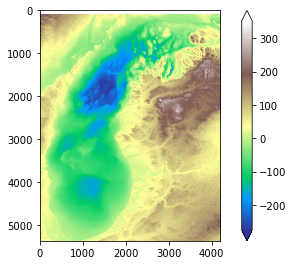

In [31]:
fig = plt.figure()
# add axes by hand like last week
# order here is: left, bottom, width, height
plt.ioff()
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

out = ipywidgets.Output()  ### NEW WIDGET CALL
display(out)

The `Output` widget sort of "captures" the display until we explictly call it in context:

In [32]:
with out:
    display(fig)

We use the `Layout` widget call, along with `figsize` in matplotlib to change the size of our image:

In [33]:
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

#del out
out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))  ### NEW WIDGET CALL
display(out) # hold our output...

with out: # until we explicitly say display!
    display(fig) # only display the fig when we explitly say to!

Output(layout=Layout(height='500px', width='500px'))

Why would we bother making our lives more complicated like this instead of just using `@interact` like we did before?  So that we can start placing our widgets where we want and start to have a little more control over what we are displaying and how.  For example, let's add a dropdown menu by hand:

In [34]:
dropdown = ipywidgets.Dropdown(options=plt.colormaps())

In [35]:
dropdown.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

`dropdown.index` gives us the # of the color map from `plt.colormaps()`.  Let's add this in:

In [42]:
import matplotlib.colors as mpl_colors

In [43]:
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

#del out
out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))
dropdown = ipywidgets.Dropdown(options=plt.colormaps())

hbox=ipywidgets.HBox([out, dropdown])

display(hbox)
with out:
    display(fig)

So now we can start placing our interactive widgets how we want!  Note that if update the dropdown, nothing happens because its not connected to the plot anyway.  Let's work on connecting our dropdown menu to our plot using an `.observe` traitlets call:

In [44]:
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

#del out
out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))
dropdown = ipywidgets.Dropdown(options=plt.colormaps())

hbox=ipywidgets.HBox([out, dropdown])

display(hbox)
#with out:
#    display(fig)

def updateDropdown(change):
    print(change) # first just print

    with out:
        clear_output(wait=True) # clear everything on the display - don't keep making figures!
        display(fig)
        
dropdown.observe(updateDropdown)


Let's use `change['owner'].index` to grab the index of the colormap we want:

In [45]:
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))
dropdown = ipywidgets.Dropdown(options=plt.colormaps())

hbox=ipywidgets.HBox([out, dropdown])

display(hbox)

def updateDropdown(change):
    cmap=plt.colormaps()[change['owner'].index] # grab our new cmap
    # let's start by clearing out all our previous axes and starting with a fresh canvas
    for a in fig.axes:
        fig.delaxes(a)
        
    # draw on our axes like before
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 
    # make an image and assign a color map
    image = ax.imshow(michigan, cmap=cmap)
    fig.colorbar(image, extend = 'both')

    # display with an output widget
    with out:
        clear_output(wait=True) # clear everything on the display - don't keep making figures!
        display(fig)
        
dropdown.observe(updateDropdown)


So, it's a little annoying that we have to wait to select something to display, so let's reorganize our function a bit to make it look nice:

In [46]:
#plt.close('all') # if you get a "too many figures open" warning
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))
dropdown = ipywidgets.Dropdown(options=plt.colormaps())

hbox=ipywidgets.HBox([out, dropdown])

display(hbox)

def updateDropdown(change):
    if change is not None:
        cmap=plt.colormaps()[change['owner'].index]
        for a in fig.axes:
            fig.delaxes(a)
        ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

        image = ax.imshow(michigan, cmap=cmap)
        fig.colorbar(image, extend = 'both')

    with out:
        clear_output(wait=True)
        display(fig)
        
dropdown.observe(updateDropdown)

updateDropdown(None)

Let's keep going and add in our toggle box!

In [47]:
plt.close('all') # if you get a "too many figures open" warning
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))
#dropdown = ipywidgets.Dropdown(options=plt.colormaps())

# just so that we can start with 'terrain'
dropdown = ipywidgets.Dropdown(options=plt.colormaps(), index=plt.colormaps().index('terrain'))
toggleButton = ipywidgets.ToggleButton(value=False,description='Log Norm?')

controls = ipywidgets.VBox([dropdown, toggleButton])
hbox=ipywidgets.HBox([out, controls])

display(hbox)

# (2) update figure based on toggle on/off
def updateToggle(change):
    if change is not None:
        #print(change)
        #print(change['owner'])
        #print(change['owner'].value)
        
        # grab base colormap from other widget
        cmap=plt.colormaps()[dropdown.index]
        for a in fig.axes:
            fig.delaxes(a)
        ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 
        
        # pick norm based on toggle button
        if change['owner'].value:
            norm = mpl_colors.SymLogNorm(10)
        else:
            norm = mpl_colors.Normalize()

        image = ax.imshow(michigan, cmap=cmap, norm=norm)
        fig.colorbar(image, extend = 'both')

    with out:
        clear_output(wait=True)
        display(fig)     
toggleButton.observe(updateToggle)


# (1) update figure based on dropdown
# AND MAKE SURE WE ADD IN RESULTS OF TOGGLE BUTTON!
def updateDropdown(change):
    if change is not None:
        cmap=plt.colormaps()[change['owner'].index]
        for a in fig.axes:
            fig.delaxes(a)
        ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 
        
        # pick norm based on toggle button
        if toggleButton.value:
            norm = mpl_colors.SymLogNorm(10)
        else:
            norm = mpl_colors.Normalize()

        image = ax.imshow(michigan, cmap=cmap, norm=norm)
        fig.colorbar(image, extend = 'both')

    with out:
        clear_output(wait=True)
        display(fig)     
dropdown.observe(updateDropdown)


updateDropdown(None)
updateToggle(None)

Finally, note that we can now move around each widget individually on our plot:

In [48]:
plt.close('all') # if you get a "too many figures open" warning
fig = plt.figure(figsize=(8,8))
# add axes by hand like last week
# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 

image = ax.imshow(michigan, cmap='terrain')
fig.colorbar(image, extend = 'both')

out = ipywidgets.Output(layout=ipywidgets.Layout(height='500px', width = '500px'))
#dropdown = ipywidgets.Dropdown(options=plt.colormaps())

# just so that we can start with 'terrain'
dropdown = ipywidgets.Dropdown(options=plt.colormaps(), index=plt.colormaps().index('terrain'))
toggleButton = ipywidgets.ToggleButton(value=False,description='Log Norm?')

controls = ipywidgets.VBox([dropdown, toggleButton])
controls.layout.top = '200px' # UPDATED
hbox=ipywidgets.HBox([out, controls])

display(hbox)

# (2) update figure based on toggle on/off
def updateToggle(change):
    if change is not None:
        
        # grab base colormap from other widget
        cmap=plt.colormaps()[dropdown.index]
        for a in fig.axes:
            fig.delaxes(a)
        ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 
        
        # pick norm based on toggle button
        if change['owner'].value:
            norm = mpl_colors.SymLogNorm(10)
        else:
            norm = mpl_colors.Normalize()

        image = ax.imshow(michigan, cmap=cmap, norm=norm)
        fig.colorbar(image, extend = 'both')

    with out:
        clear_output(wait=True)
        display(fig)     
toggleButton.observe(updateToggle)


# (1) update figure based on dropdown
# AND MAKE SURE WE ADD IN RESULTS OF TOGGLE BUTTON!
def updateDropdown(change):
    if change is not None:
        cmap=plt.colormaps()[change['owner'].index]
        for a in fig.axes:
            fig.delaxes(a)
        ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) 
        
        # pick norm based on toggle button
        if toggleButton.value:
            norm = mpl_colors.SymLogNorm(10)
        else:
            norm = mpl_colors.Normalize()

        image = ax.imshow(michigan, cmap=cmap, norm=norm)
        fig.colorbar(image, extend = 'both')

    with out:
        clear_output(wait=True)
        display(fig)     
dropdown.observe(updateDropdown)


updateDropdown(None)
updateToggle(None)

/Users/jnaiman/opt/anaconda3/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.


This seems a lot more complicated: why would we bother?

1. You don't have to if you don't want to! (At least for this week...)
1. It gives us finer-grained control over where to place things when we start building up multi-panel dashboards.

Taking some time to understand widgets in this context will help you design custom dashboards for your analysis & visualization needs. 

`bqplot`, which we will use next week, uses this sort of layout options to link figures with widgets, but makes this sort of design a lot easier then what we just did!